In [ ]:
from hashlib import algorithms_guaranteed

import librosa
import librosa.display
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 检查可用字体
# fonts = [f.name for f in fm.fontManager.ttflist]
# print("可用字体:", fonts)

# 设置中文字体
plt.rcParams["font.family"] = ["SimHei","Times New Roman"]  # 使用系统中存在的字体（可叠加）

# 加载音频文件
# audio_path = librosa.example('trumpet')  # 使用示例音频
audio_path = r'D:\course\CUC_0\审听训练与主观音质评价\音频\2-10.wav'  # 绝对路径前加一个r，相对路径则不需要
y, sr = librosa.load(audio_path)

# 绘制时域波形图
plt.figure(figsize=(18, 6))
librosa.display.waveshow(y, sr=sr, alpha=0.5)
plt.title('音频时域波形')
plt.xlabel('时间 (秒)')
plt.ylabel('振幅')
plt.show()

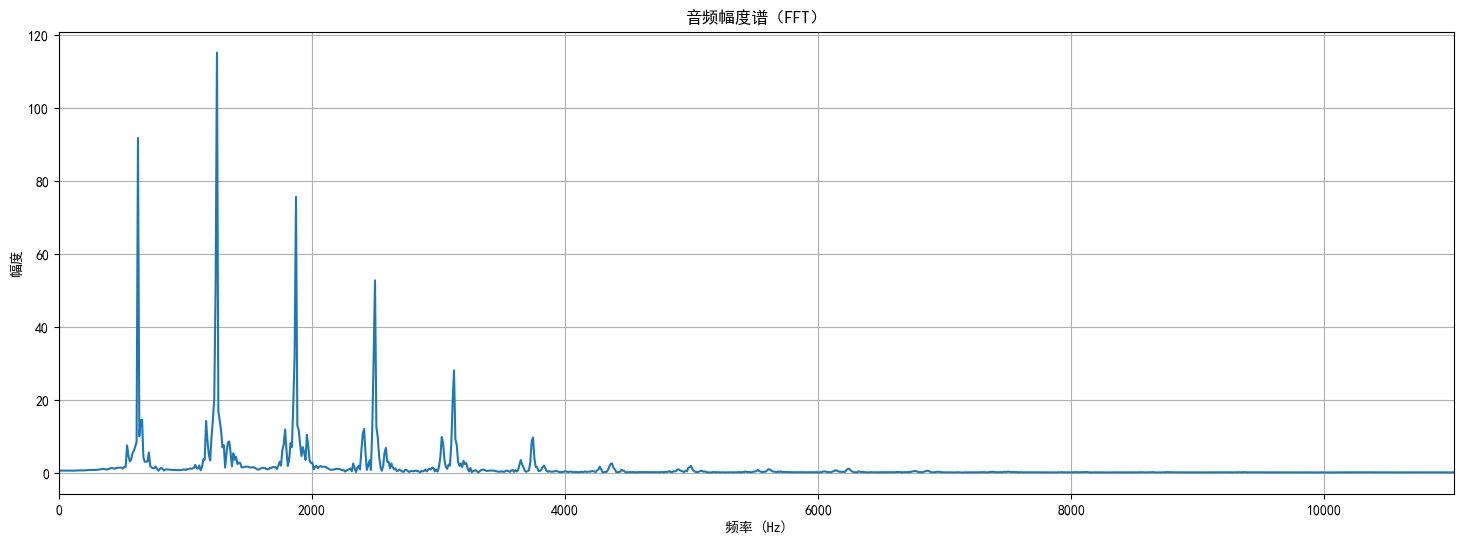

In [14]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# 绘制幅度谱
# 加载音频文件
audio_path = librosa.example('trumpet')
y, sr = librosa.load(audio_path, duration=2)  # 加载前2秒

# 计算FFT
n_fft = 2048  # FFT窗口大小
Y = np.fft.rfft(y, n=n_fft)  # 实值FFT（只保留正频率部分）
amplitude = np.abs(Y)  # 幅度谱
frequency = np.fft.rfftfreq(n_fft, d=1/sr)  # 频率轴

# 绘制幅度谱
plt.figure(figsize=(18, 6))
plt.plot(frequency, amplitude)
plt.title('音频幅度谱（FFT）')
plt.xlabel('频率 (Hz)')
plt.ylabel('幅度')
plt.grid(True)
plt.xlim(0, sr/2)  # 限制在Nyquist频率以内
plt.show()

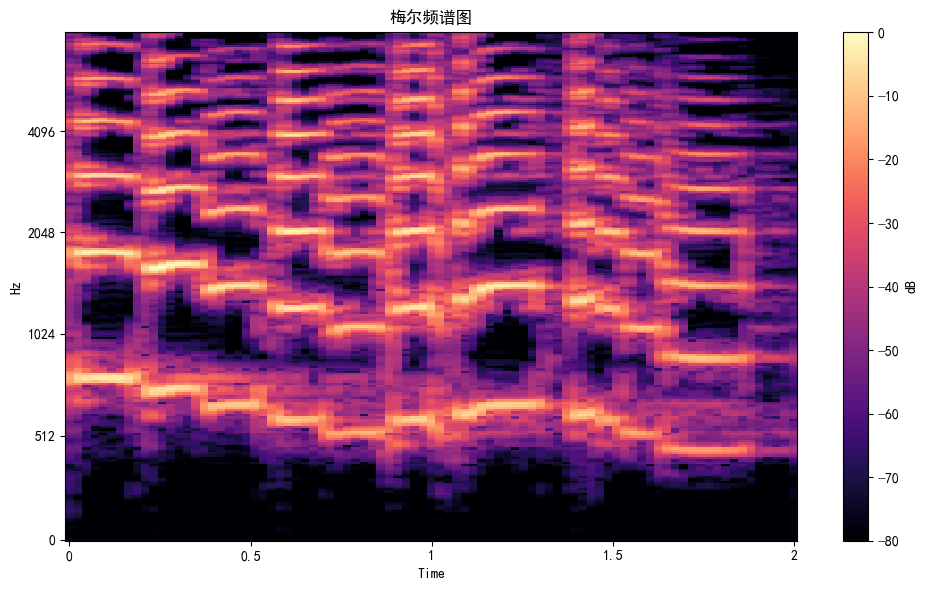

In [17]:
# 计算梅尔频谱
S = librosa.feature.melspectrogram(y=y,
                                   sr=sr,
                                   n_mels=256,  # 梅尔带数量
                                   fmax=4000)  # 最大频率

# 转换为 dB 单位
S_dB = librosa.power_to_db(S, ref=np.max)

# 绘制梅尔频谱图
plt.figure(figsize=(10, 6))
librosa.display.specshow(S_dB,
                         sr=sr,
                         x_axis='time',
                         y_axis='mel',  # y 轴为梅尔频率
                         fmax=8000)
plt.colorbar(label='dB')
plt.title('梅尔频谱图')
plt.tight_layout()
plt.show()

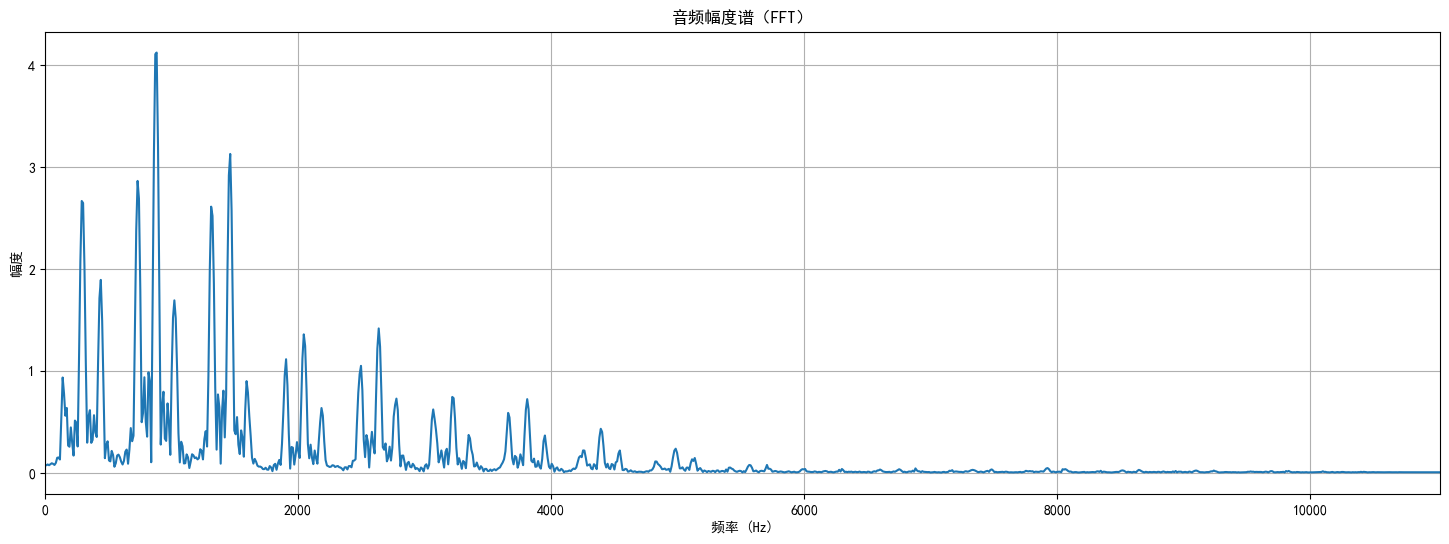

In [24]:
sg_path = r"D:\course\CUC_0\Py_dsp_learn\Sample_sound\478292__joao_janz__alarm-2_6.wav"

sg,sr = librosa.load(sg_path)

n_fft = 2048
spec = np.fft.rfft(sg, n_fft)
amplitude = np.abs(spec)  # 幅度谱
frequency = np.fft.rfftfreq(n_fft, d=1/sr)  # 频率轴

# 绘制幅度谱
plt.figure(figsize=(18, 6))
plt.plot(frequency, amplitude)
plt.title('幅度谱（FFT）')
plt.xlabel('频率 (Hz)')
plt.ylabel('幅度')
plt.grid(True)
plt.xlim(0, sr/2)  # 限制在Nyquist频率以内
plt.show()